In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
cd .. 

/home/jovyan/UCLA_CSX_450_2_Final


In [3]:
run src/load_data.py

In [4]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
sale_df                      DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df     

In [5]:
!pip install tqdm

In [7]:
from sklearn.decomposition import PCA

In [8]:
import lib.visuals as vs

In [9]:
pca = PCA()
pca.fit(numeric_final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

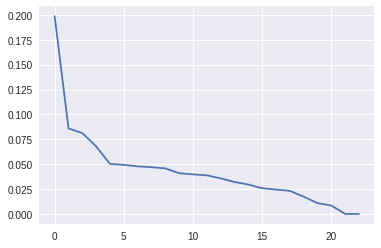

In [10]:
plt.plot(pca.explained_variance_ratio_)

In [11]:
features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FirstFlrSF', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage']

In [12]:
housing_numerical_df = housing_df.select_dtypes(exclude=['category'])
housing_numerical_log_df = np.log(housing_numerical_df + 0.5)

scaler = StandardScaler()
housing_numerical_sc = scaler.fit_transform(housing_numerical_df)
housing_numerical_sc_df = pd.DataFrame(housing_numerical_sc, columns=housing_numerical_df.columns)

housing_numerical_log_sc = scaler.transform(housing_numerical_log_df)
housing_numerical_log_sc_df = pd.DataFrame(housing_numerical_log_sc, columns=housing_numerical_df.columns)

gelman_df = (housing_numerical_log_df - housing_numerical_log_df.mean())/(2*housing_numerical_log_df.std())

In [13]:
pca = PCA(5)
pca.fit(housing_df[features])

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

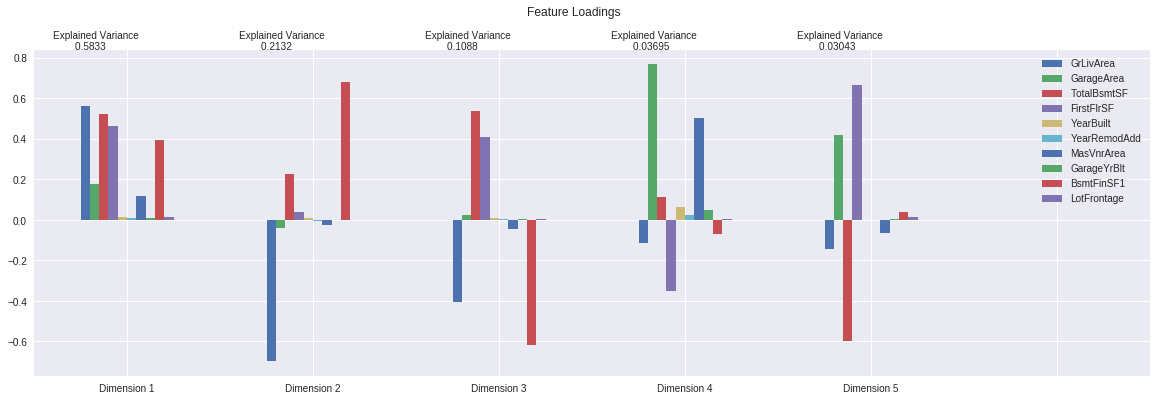

In [14]:
gelman_loading_plot = vs.FeatureLoadingsPlot(gelman_df[features], pca, 5)
gelman_loading_plot.display_segments()

Dimension 1:

This type of house has large Ground living area square feet, total basement square feet, first floor square feet and type 1 finished square feet. will affect the housing sale price. The larger house, the more expensive price.

Dimension 2:

Ground living area and type 1 finished square feet are more important to dermine the housing price. 

Dimension 3:

Ground living area, total basement square feet, first floor square feet and type 1 finished square feet are more important to dermine the housing price.

In [15]:
whos PCA

Variable   Type    Data/Info
----------------------------
pca        PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)


In [16]:
dims_5 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5'] # create a list

gelman_df_pca = pd.DataFrame(pca.transform(gelman_df[features]))
gelman_df_pca.columns = dims_5

100%|██████████| 3/3 [00:00<00:00, 12.27it/s]

For n_clusters = 2 the silhouette score is 0.24793244747486795.
For n_clusters = 3 the silhouette score is 0.2679516561942317.
For n_clusters = 4 the silhouette score is 0.3107547448649882.


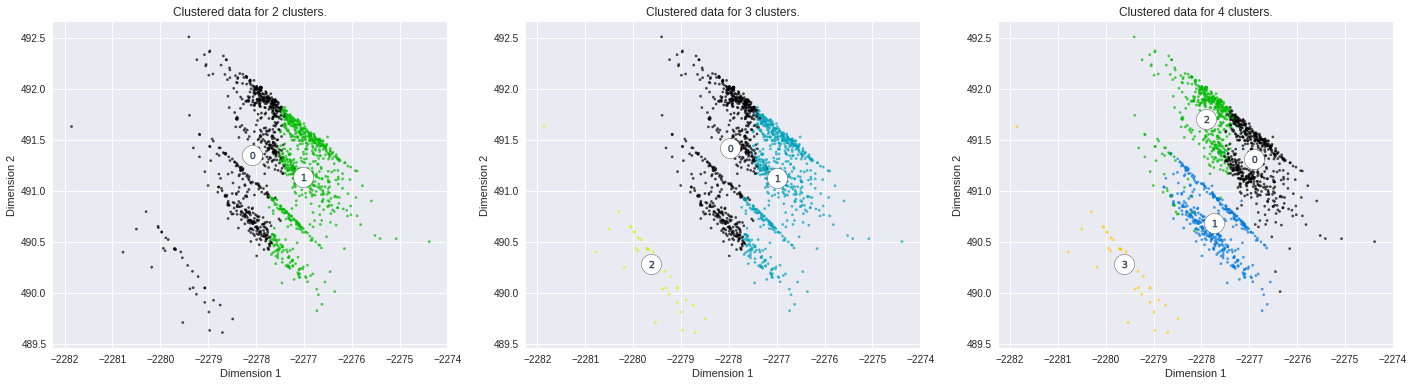

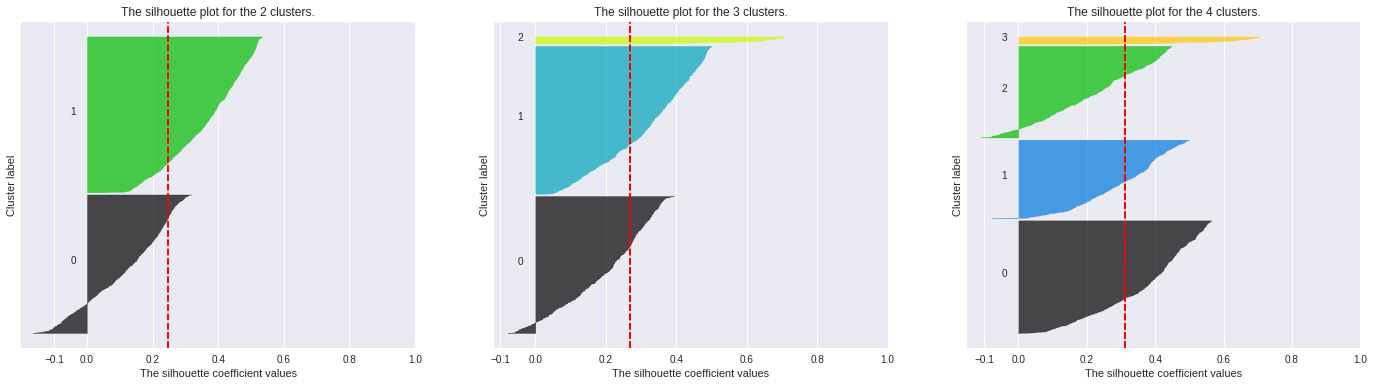

In [17]:
gelman_pca_clusters = vs.Clusters(gelman_df_pca, [2,3,4])
gelman_pca_clusters.cluster_plots()
gelman_pca_clusters.silhouette_plots()